In [1]:
import time
start_time=time.time()
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord, EarthLocation
from astropy import units as u
from astropy.time import Time
import pickle
import itertools
import statsmodels.api as sm
from scipy import interpolate

from sabreMod import sosf,sosfn
plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="12"


ISIS red arm

In [2]:
Red=dict()
Red[0]='Obs\ISIS.595.Red.txt'
DataR=pd.read_table(Red[0])
DataR=DataR.rename(columns={"Center":"Center.0","ErrC":"ErrC.0","Width":"Width.0","ErrW":"ErrW.0","Peak":"Peak.0","ErrP":"ErrP.0","Line":"Line.0","ErrL":"ErrL.0"})
DataR

,Pos,X,Y,Slit,Archivo,Center.0,ErrC.0,Width.0,ErrW.0,Peak.0,...,Line.3,ErrL.3,Center.4,ErrC.4,Width.4,ErrW.4,Peak.4,ErrP.4,Line.4,ErrL.4
0,1.0,199.809,22.0,1.0,595r1_878-001004.xlsx,6562.267,0.211,-4.288,0.464,-31.70,...,8.525,7.594,6726.756,0.296,1.419,0.544,13.700,5.127,20.690,7.479
1,2.0,198.468,22.0,1.0,595r1_878-005008.xlsx,6557.690,0.228,0.882,0.404,16.36,...,18.900,6.029,6725.364,0.150,0.913,0.297,-1.937,4.781,-1.883,-4.577
2,3.0,197.127,22.0,1.0,595r1_878-009012.xlsx,6557.705,0.108,0.970,0.262,35.66,...,7.970,9.081,6724.843,0.551,2.664,1.016,8.852,3.333,25.110,9.367
3,4.0,195.786,22.0,1.0,595r1_878-013016.xlsx,6557.593,0.083,0.916,0.202,41.62,...,17.990,8.705,6725.727,0.605,2.698,1.057,3.842,2.687,11.030,8.172
4,5.0,194.445,22.0,1.0,595r1_878-017020.xlsx,6557.546,0.082,0.813,0.195,40.74,...,-14.250,-5.156,6724.045,0.154,0.948,0.355,-8.792,4.558,-8.870,-5.081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
i=0#Halfa
DtR=[DataR.X, DataR.Y,DataR["Center."+str(i)],DataR["ErrC.0"],DataR["Width.0"],DataR["ErrW.0"],DataR["Peak.0"],DataR["ErrP.0"],DataR["Line.0"],DataR["ErrL.0"]]
DtR=pd.DataFrame(DtR).T
DtR=DtR.dropna()
DtR

,X,Y,Center.0,ErrC.0,Width.0,ErrW.0,Peak.0,ErrP.0,Line.0,ErrL.0
0,199.809,22.0,6562.267,0.211,-4.288,0.464,-31.70,2.961,144.70,14.610
1,198.468,22.0,6557.690,0.228,0.882,0.404,16.36,7.835,15.35,7.365
2,197.127,22.0,6557.705,0.108,0.970,0.262,35.66,8.420,36.82,8.908
3,195.786,22.0,6557.593,0.083,0.916,0.202,41.62,8.005,40.58,8.057
4,194.445,22.0,6557.546,0.082,0.813,0.195,40.74,8.031,35.24,7.111
...,...,...,...,...,...,...,...,...,...,...
1345,5.364,0.0,6557.976,0.099,1.054,0.227,46.38,8.686,52.02,10.130
1346,4.023,0.0,6557.936,0.062,0.944,0.125,75.62,9.107,76.00,9.442
1347,2.682,0.0,6557.975,0.032,-0.698,0.101,103.90,11.990,-77.13,-8.686
1348,1.341,0.0,6557.999,0.023,0.744,0.067,135.80,10.490,107.60,8.301


ISIS Blue arm

In [4]:
Blue=dict()
Blue[0]='Obs\ISIS.595.Blue.txt'
DataB=pd.read_table(Blue[0])
DataB=DataB.rename(columns={"Center":"Center.0","ErrC":"ErrC.0","Width":"Width.0","ErrW":"ErrW.0","Peak":"Peak.0","ErrP":"ErrP.0","Line":"Line.0","ErrL":"ErrL.0"})
DataB

,Pos,X,Y,Slit,Archivo,Center.0,ErrC.0,Width.0,ErrW.0,Peak.0,...,ErrC.2,Width.2,ErrW.2,Peak.2,ErrP.2,Line.2,ErrL.2,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,1.0,214.5600,22.0,1.0,595a1_880-001004.xlsx,4853.837,0.185,0.644,0.374,10.260,...,50.299,176.260,76.337,-2.921,0.7299,-548.000,-348.100,NaN,NaN,NaN
1,2.0,213.1296,22.0,1.0,595a1_880-005008.xlsx,4855.518,0.298,0.287,0.873,-9.238,...,4.219,34.160,8.581,-2.898,0.7155,-105.400,-28.260,NaN,NaN,NaN
2,3.0,211.6992,22.0,1.0,595a1_880-009012.xlsx,4850.115,0.978,-1.573,1.036,3.090,...,1.416,7.574,2.570,-4.309,1.5730,-34.740,-12.440,NaN,NaN,NaN
3,4.0,210.2688,22.0,1.0,595a1_880-013016.xlsx,4514.190,5.551,-282.157,23.988,75.120,...,0.423,1.494,0.762,-5.956,3.1770,-9.471,-5.178,NaN,NaN,NaN
4,5.0,208.8384,22.0,1.0,595a1_880-017020.xlsx,4855.943,0.000,-0.242,0.121,-53.670,...,0.000,0.103,0.000,46700.000,0.0000,5126.000,4659.000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
i=0#Habeta
DtB=[DataB.X, DataB.Y,DataB["Center."+str(i)],DataB["ErrC.0"],DataB["Width.0"],DataB["ErrW.0"],DataB["Peak.0"],DataB["ErrP.0"],DataB["Line.0"],DataB["ErrL.0"]]
DtB=pd.DataFrame(DtB).T
DtB=DtB.dropna()
DtB

,X,Y,Center.0,ErrC.0,Width.0,ErrW.0,Peak.0,ErrP.0,Line.0,ErrL.0
0,214.5600,22.0,4853.837,0.185,0.644,0.374,10.260,5.554,7.035,3.663
1,213.1296,22.0,4855.518,0.298,0.287,0.873,-9.238,59.720,-2.819,-9.860
2,211.6992,22.0,4850.115,0.978,-1.573,1.036,3.090,3.628,-5.174,-5.697
3,210.2688,22.0,4514.190,5.551,-282.157,23.988,75.120,39.470,-22560.000,-10180.000
4,208.8384,22.0,4855.943,0.000,-0.242,0.121,-53.670,91.060,13.800,16.780
...,...,...,...,...,...,...,...,...,...,...
1345,7.1520,0.0,4850.225,0.229,0.785,0.427,14.540,6.429,12.150,5.400
1346,5.7216,0.0,4855.636,0.552,2.268,1.164,-8.590,3.540,-20.740,-9.502
1347,4.2912,0.0,4822.424,0.000,-98.313,0.000,4.795,0.000,-501.800,0.000
1348,2.8608,0.0,4854.963,3.373,2.782,2.324,-1.822,2.951,-5.397,-8.323


Halfa

Peak

In [6]:
DtR.describe()

,X,Y,Center.0,ErrC.0,Width.0,ErrW.0,Peak.0,ErrP.0,Line.0,ErrL.0
count,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,99.904500,10.568889,6552.893615,0.073021,0.992124,0.159281,556.393926,9.402553,365.065564,18.465432
std,58.087231,6.978156,178.481298,0.159322,0.865020,0.259616,6187.632056,19.477415,1277.947535,381.236733
min,0.000000,0.000000,0.000000,0.000000,-4.492000,0.000000,-33.060000,0.000000,-5599.000000,-208.700000
25%,49.617000,5.000000,6557.555250,0.018000,0.897000,0.041000,46.185000,6.776750,42.730000,7.404250
50%,99.904500,11.000000,6557.742500,0.038000,1.009000,0.088000,96.235000,7.518500,99.000000,8.322500
75%,150.192000,15.000000,6557.936000,0.078750,1.152000,0.179750,231.375000,8.520000,224.625000,9.526250
max,199.809000,22.000000,6562.935000,3.625000,21.510000,4.882000,224500.000000,559.300000,23770.000000,14010.000000


In [7]:
#data_P=(DtR.round(2)).pivot(index='Y', columns='X', values='Peak.0')#TableFormat

sz=2
wd=DataR.X.max()-DataR.X.min()
hd=DataR.Y.max()-DataR.Y.min()
ar=wd/hd

#fig, ax = plt.subplots(figsize=(sz*ar,sz))
#sns.heatmap(data_P, cmap="inferno")
#plt.gca().invert_yaxis()
#plt.axis('equal')

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\ZAINTEL2\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


(-9.990450000000003, 209.79945000000004, -1.1, 23.1)

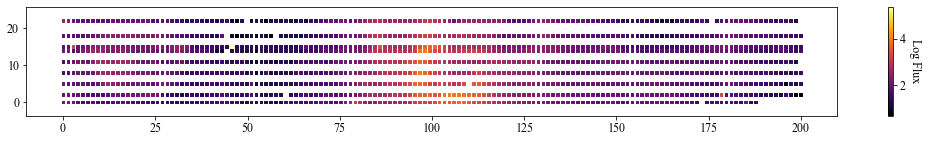

In [8]:
fig, ax = plt.subplots(figsize=(sz*ar,sz))

plt.scatter(DtR.X,DtR.Y,c=np.log10(DtR['Peak.0']), s=8,marker='s',cmap="inferno")
cbar = plt.colorbar()
cbar.set_label('Log Flux', rotation=270, labelpad=15)  
plt.axis('equal')

(0.0, 38.0, 0.0, 9.0)

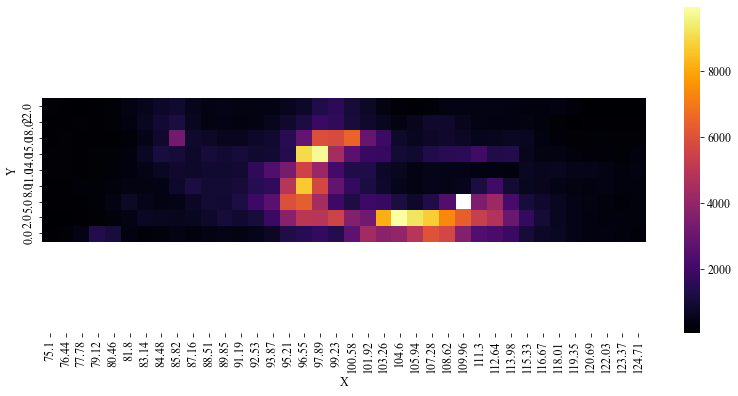

In [9]:
mPR=(DtR.X>75)&(DtR.X<125)&(DtR["Peak.0"]>0)
data_PR=(DtR[mPR].round(2)).pivot(index='Y', columns='X', values='Peak.0')#TableFormat

sz=6

wd=DtR[mPR].X.max()-DtR[mPR].X.min()
hd=DtR[mPR].Y.max()-DtR[mPR].Y.min()
ar=wd/hd

fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(data_PR, cmap="inferno")
plt.gca().invert_yaxis()
plt.axis('equal')

Heliocentric Radial velocity 

In [10]:
l=[6562.8]#AngstromsR

c=299792.459#km/s

RA=23.390942#J2000
Dec=30.691559#J200

orm = EarthLocation.of_site('Roque de los Muchachos')
sc = SkyCoord(ra=RA*u.deg, dec=Dec*u.deg)
heliocorr = sc.radial_velocity_correction('heliocentric', obstime=Time('1992-8-18'), location=orm) 
heliocorr.to(u.km/u.s) 
corrhelio=np.array(heliocorr.to(u.km/u.s))

RVo=c*(DtR["Center.0"]-l)/l
RV=RVo+corrhelio

DtR=DtR.assign(RV=RV.values)

(0.0, 38.0, 0.0, 9.0)

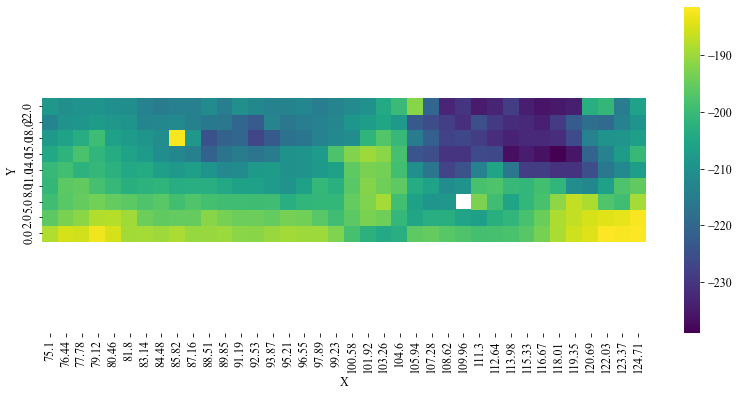

In [11]:
data_VR=(DtR[mPR].round(2)).pivot(index='Y', columns='X', values='RV')#TableFormat

fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(data_VR, cmap="viridis")
plt.gca().invert_yaxis()
plt.axis('equal')

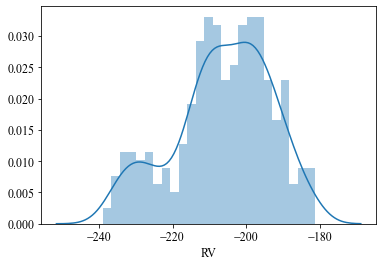

In [12]:

sns.distplot(DtR.RV[mPR],bins=25)

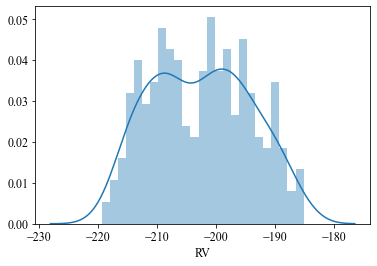

In [13]:
DtRm=DtR[mPR]
mRR=(DtRm.RV>-220)&(DtR.RV<-185)
sns.distplot(DtRm.RV[mRR],bins=25)

<ipython-input-14-382e01d28f00>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_VRm=(DtRm[mRR].round(2)).pivot(index='Y', columns='X', values='RV')#TableFormat


(0.0, 38.0, 0.0, 9.0)

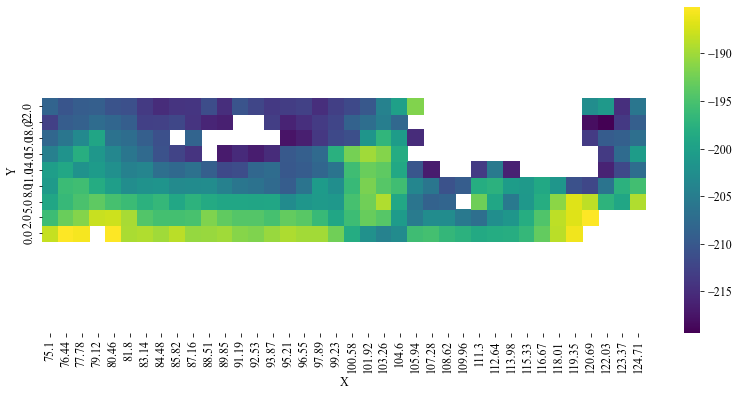

In [14]:
data_VRm=(DtRm[mRR].round(2)).pivot(index='Y', columns='X', values='RV')#TableFormat

fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(data_VRm, cmap="viridis")
plt.gca().invert_yaxis()
plt.axis('equal')

Sigma

In [15]:
T=7450#K Table 5

Xw=1.00794#
SI=18#km/s

#SigmaObs
a=0.6006/1.414
SigmaObs=a*(DtR["Width.0"]/l)*c
    
#SigmaTerm
b=166.6/1.414
SigmaTerm=np.sqrt(b*(T/10000)/Xw)

SigmaDisp=np.sqrt(SigmaObs**2-SigmaTerm**2-SI**2)

DtR=DtR.assign(Sig=SigmaDisp.values)

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


(0.0, 38.0, 0.0, 9.0)

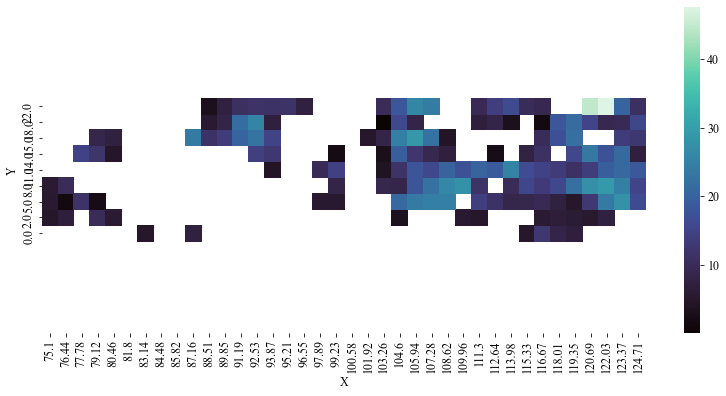

In [16]:
data_SR=(DtR[mPR].round(2)).pivot(index='Y', columns='X', values='Sig')#TableFormat
fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(data_SR, cmap="mako")
plt.gca().invert_yaxis()
plt.axis('equal')

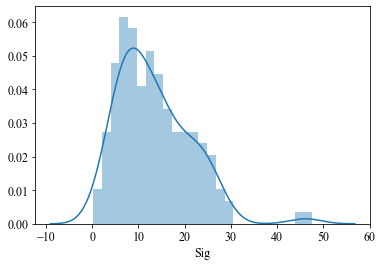

In [17]:
sns.distplot(DtR[mPR].Sig,bins=25)

Hbeta

Peak

(0.0, 150.0, 0.0, 9.0)

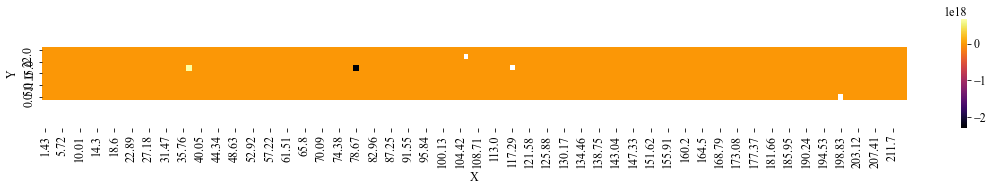

In [18]:
data_PB=(DtB.round(2)).pivot(index='Y', columns='X', values='Peak.0')#TableFormat

sz=2
wd=DataB.X.max()-DataB.X.min()
hd=DataB.Y.max()-DataB.Y.min()
ar=wd/hd

fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(data_PB, cmap="inferno")
plt.gca().invert_yaxis()
plt.axis('equal')

(0.0, 16.0, 0.0, 9.0)

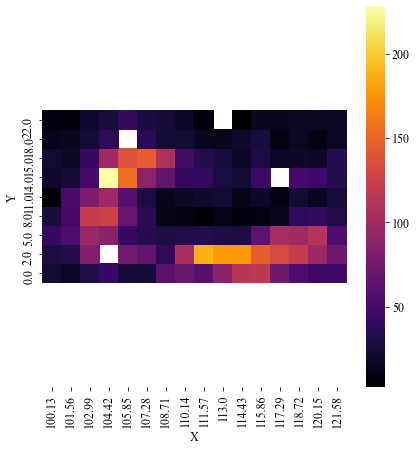

In [19]:
mPB=(DtB.X>100)&(DtB.X<122)&(DtB["Peak.0"]>0)&(DtB["Peak.0"]<250)
data_PB=(DtB[mPB].round(2)).pivot(index='Y', columns='X', values='Peak.0')#TableFormat

sz=7
wd=DtB[mPB].X.max()-DtB[mPB].X.min()
hd=DtB[mPB].Y.max()-DtB[mPB].Y.min()
ar=wd/hd

fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(data_PB, cmap="inferno")
plt.gca().invert_yaxis()
plt.axis('equal')

In [20]:
l=[4861.36]#AngstromsR

c=299792.459#km/s

RA=23.638292#J2000
Dec=30.784889#J200

orm = EarthLocation.of_site('Roque de los Muchachos')
sc = SkyCoord(ra=RA*u.deg, dec=Dec*u.deg)
heliocorr = sc.radial_velocity_correction('heliocentric', obstime=Time('1992-8-18'), location=orm) 
heliocorr.to(u.km/u.s) 
corrhelio=np.array(heliocorr.to(u.km/u.s))

RVo=c*(DtB["Center.0"]-l)/l
RV=RVo+corrhelio

DtB=DtB.assign(RV=RV.values)

(0.0, 16.0, 0.0, 9.0)

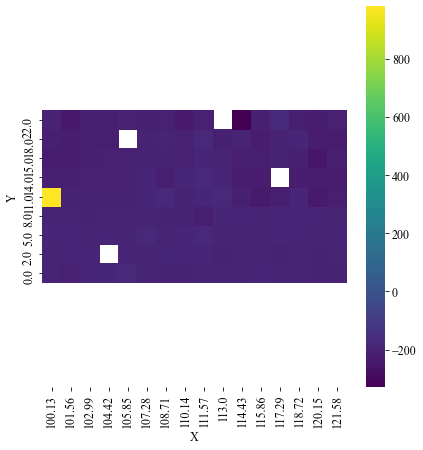

In [21]:
data_VB=(DtB[mPB].round(2)).pivot(index='Y', columns='X', values='RV')#TableFormat
fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(data_VB, cmap="viridis")
plt.gca().invert_yaxis()
plt.axis('equal')

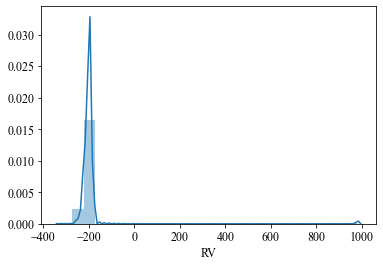

In [22]:
sns.distplot(DtB[mPB].RV,bins=25)

(0.0, 16.0, 0.0, 9.0)

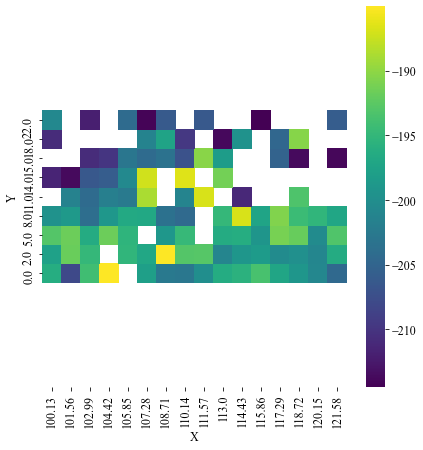

In [23]:
DtBI=DtB[mPB]
mRB=((DtBI["RV"]>-215))&((DtBI["RV"]<-185))

data_VB=(DtBI[mRB].round(2)).pivot(index='Y', columns='X', values='RV')#TableFormat
fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(data_VB, cmap="viridis")
plt.gca().invert_yaxis()
plt.axis('equal')

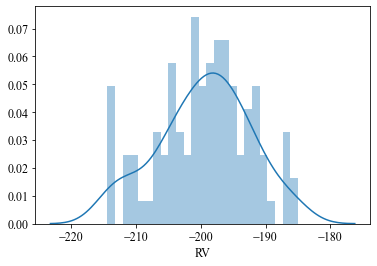

In [24]:
sns.distplot(DtBI[mRB].RV,bins=25)

In [25]:
DtBII=DtBI[mRB]

In [26]:
T=7450#K Table 5

Xw=1.00794#
SI=18#km/s

#SigmaObs
a=0.6006/1.414
SigmaObs=a*(DtBII["Width.0"]/l)*c
    
#SigmaTerm
b=166.6/1.414
SigmaTerm=np.sqrt(b*(T/10000)/Xw)

SigmaDisp=np.sqrt(SigmaObs**2-SigmaTerm**2-SI**2)

DtBII=DtBII.assign(Sig=SigmaDisp.values)

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


<ipython-input-27-ed46b2f557c0>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_SB=(DtBII[mRB].round(2)).pivot(index='Y', columns='X', values='Sig')#TableFormat


(0.0, 16.0, 0.0, 9.0)

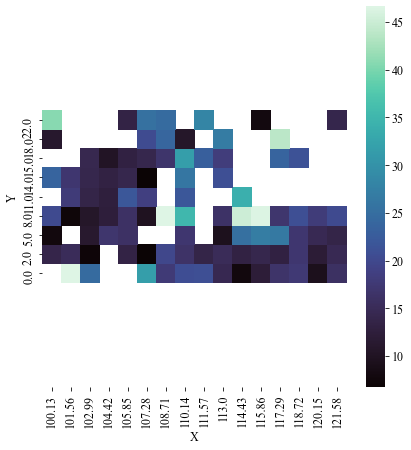

In [27]:
data_SB=(DtBII[mRB].round(2)).pivot(index='Y', columns='X', values='Sig')#TableFormat
fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(data_SB, cmap="mako")
plt.gca().invert_yaxis()
plt.axis('equal')

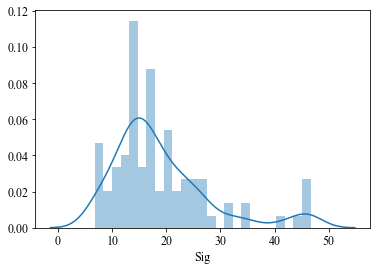

In [28]:
sns.distplot(DtBII.Sig,bins=25)

Comparison

(0.0, 38.0, 0.0, 9.0)

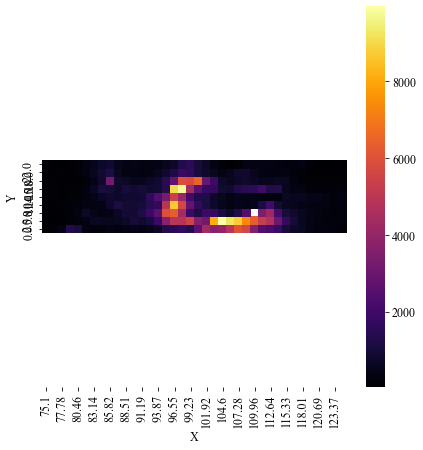

In [29]:
fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(data_PR, cmap="inferno")
plt.gca().invert_yaxis()
plt.axis('equal')

Matching zones

Halfa

(0.0, 17.0, 0.0, 9.0)

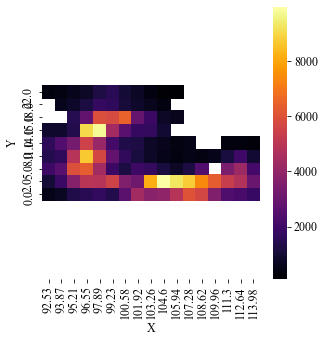

In [30]:
mPIR=(DtR.X>92)&(DtR.X<115)&(DtR["Peak.0"]>0)&(DtR.RV>-220)&(DtR.RV<-185)
data_PR=(DtR[mPIR].round(2)).pivot(index='Y', columns='X', values='Peak.0')#TableFormat

sz=5

fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(data_PR, cmap="inferno")
plt.gca().invert_yaxis()
plt.axis('equal')

Hbeta

<ipython-input-31-10d910c834a8>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_PB=(DtBII[mPB].round(2)).pivot(index='Y', columns='X', values='Peak.0')#TableFormat


(0.0, 16.0, 0.0, 9.0)

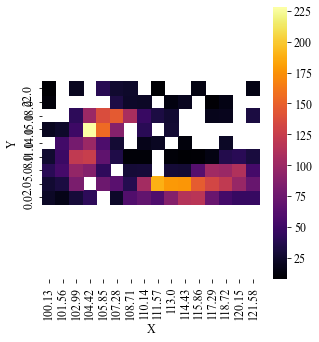

In [31]:
mPB=(DtB.X>100)&(DtB.X<122)&(DtB["Peak.0"]>0)&(DtB["Peak.0"]<250)
data_PB=(DtBII[mPB].round(2)).pivot(index='Y', columns='X', values='Peak.0')#TableFormat

fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(data_PB, cmap="inferno")
plt.gca().invert_yaxis()
plt.axis('equal')

In [32]:
DtRc=DtR[mPIR]
DtBc=DtBII

Peak

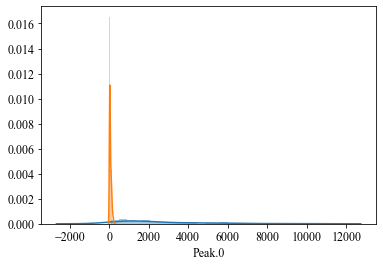

In [33]:
sns.distplot(DtRc["Peak.0"],bins=25)
sns.distplot(DtBc["Peak.0"],bins=25)

Normalize emission

In [34]:
PeakN=DtRc["Peak.0"]/DtRc["Peak.0"].max()
DtRc=DtRc.assign(PeakN=PeakN.values)

In [35]:
PeakN=DtBc["Peak.0"]/DtBc["Peak.0"].max()
DtBc=DtBc.assign(PeakN=PeakN.values)

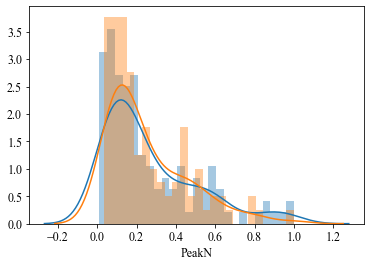

In [36]:
sns.distplot(DtRc["PeakN"],bins=25)
sns.distplot(DtBc["PeakN"],bins=25)

Radial Velocity

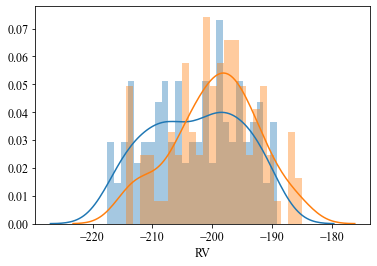

In [37]:
sns.distplot(DtRc.RV,bins=25)
sns.distplot(DtBc.RV,bins=25)

Sigma

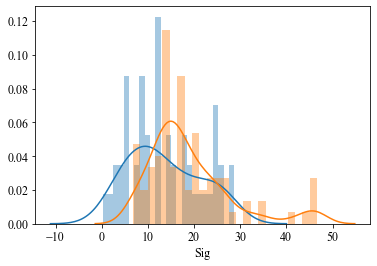

In [38]:
sns.distplot(DtRc.Sig,bins=25)
sns.distplot(DtBc.Sig,bins=25)

Structure Function

In [39]:
pc=4.16

1.0


[None, None]

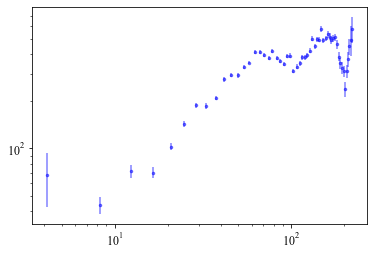

In [40]:
SF=sosf(DtR[mPR])
SF.Lag=SF.Lag*pc

fig,ax=plt.subplots()

ax.errorbar(SF.Lag,SF.Nmqvd, yerr=SF.ErrY, marker='.', fmt=' ',color="blue", ecolor="blue",
                     alpha=0.5, markersize=5)

ax.set(xscale='log',yscale='log')

In [41]:
x=SF['Lag']
y=SF['Nmqvd']-(DtR[mPR]["RV"].std())**2
tck=interpolate.splrep(x,y,s=0)
grid=np.linspace(x.min(),x.max(),num=len(x))
ynew=interpolate.splev(grid,tck,der=0)
inter=pd.DataFrame([grid,ynew]).T
SFr=interpolate.sproot(tck)
SFr

array([27.44120802])

In [42]:
s=SFr[0]

In [43]:
ss=np.round((DtR[mPR]["RV"].std())**2,2)

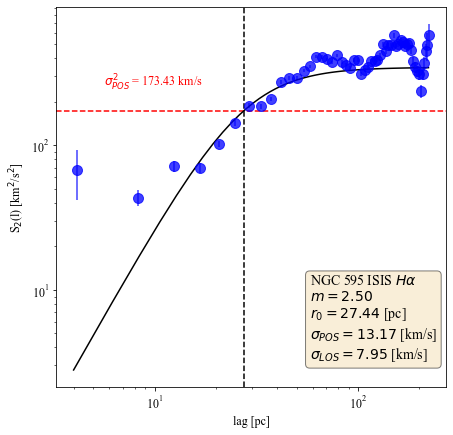

In [44]:
fig,ax=plt.subplots(figsize=(7,7))

ax.errorbar(SF.Lag,SF.Nmqvd, yerr=SF.ErrY, marker='.', fmt=' ',color="blue", ecolor="blue",
                     alpha=0.75, markersize=20)

ax.set(xlabel='lag [pc]', ylabel='S$_{2}$(l) [km$^{2}$/s$^{2}$]')

plt.axhline(y=ss, color='r', linestyle='--')
ax.text(0.25, 0.8,'$σ_{POS}^{2}$ = '+str(ss)+' km/s', ha='center', va='center', transform=ax.transAxes, color='r')


plt.axvline(x=s, color='k', linestyle='--')

lo=s

n=2.5

x=np.linspace(int(SF.Lag.min()),int(SF.Lag.max()),100)
c=1/(1+(x/lo)**n)

y=2*(1-c)*ss

plt.loglog(x,y,color='k', linestyle='-')


textstr = '\n'.join(('NGC 595 ISIS ' r'$H\alpha$' ,r'$m=%.2f$'%n, r'$r_{0}=%.2f$' % s+' [pc]',
                     r'$σ_{POS}=%.2f$' % (DtR[mPR]["RV"].std()) + ' [km/s]' , r'$σ_{LOS}=%.2f$'%(DtR[mPR]["Sig"].std()) + ' [km/s]' )) 

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.65, .3, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="20"

#ax.set_xlim(1, 250)
#ax.set_ylim(1, 750)

#fig.savefig('Img//'+samples[0][i]+'.pdf')

In [45]:
SFHa=SF

<ipython-input-46-f82118cd6794>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  SF=sosf(DtRm[mRR])


1.0


[None, None]

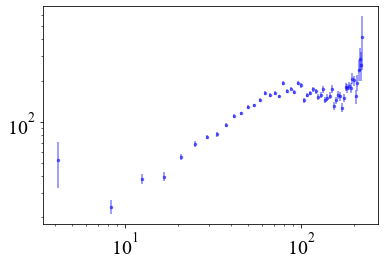

In [46]:
SF=sosf(DtRm[mRR])
SF.Lag=SF.Lag*pc

fig,ax=plt.subplots()

ax.errorbar(SF.Lag,SF.Nmqvd, yerr=SF.ErrY, marker='.', fmt=' ',color="blue", ecolor="blue",
                     alpha=0.5, markersize=5)

ax.set(xscale='log',yscale='log')

In [47]:
x=SF['Lag']
y=SF['Nmqvd']-(DtR[mRR]["RV"].std())**2
tck=interpolate.splrep(x,y,s=0)
grid=np.linspace(x.min(),x.max(),num=len(x))
ynew=interpolate.splev(grid,tck,der=0)
inter=pd.DataFrame([grid,ynew]).T
SFr=interpolate.sproot(tck)
SFr

array([25.62194511])

In [48]:
s=SFr[0]

In [49]:
ss=np.round((DtR[mRR]["RV"].std())**2,2)

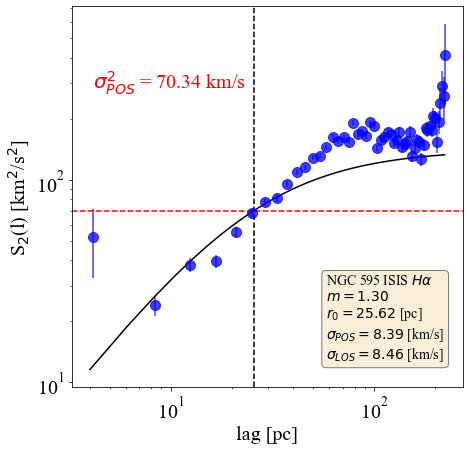

In [50]:
fig,ax=plt.subplots(figsize=(7,7))

ax.errorbar(SF.Lag,SF.Nmqvd, yerr=SF.ErrY, marker='.', fmt=' ',color="blue", ecolor="blue",
                     alpha=0.75, markersize=20)

ax.set(xlabel='lag [pc]', ylabel='S$_{2}$(l) [km$^{2}$/s$^{2}$]')

plt.axhline(y=ss, color='r', linestyle='--')
ax.text(0.25, 0.8,'$σ_{POS}^{2}$ = '+str(ss)+' km/s', ha='center', va='center', transform=ax.transAxes, color='r')


plt.axvline(x=s, color='k', linestyle='--')

lo=s

n=1.3

x=np.linspace(int(SF.Lag.min()),int(SF.Lag.max()),100)
c=1/(1+(x/lo)**n)

y=2*(1-c)*ss

plt.loglog(x,y,color='k', linestyle='-')


textstr = '\n'.join(('NGC 595 ISIS ' r'$H\alpha$' ,r'$m=%.2f$'%n, r'$r_{0}=%.2f$' % s+' [pc]',
                     r'$σ_{POS}=%.2f$' % (DtR[mRR]["RV"].std()) + ' [km/s]' , r'$σ_{LOS}=%.2f$'%(DtR[mRR]["Sig"].std()) + ' [km/s]' )) 

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.65, .3, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="20"

#ax.set_xlim(1, 250)
#ax.set_ylim(1, 750)

#fig.savefig('Img//'+samples[0][i]+'.pdf')

In [51]:
SFHam=SF

1.0


[None, None]

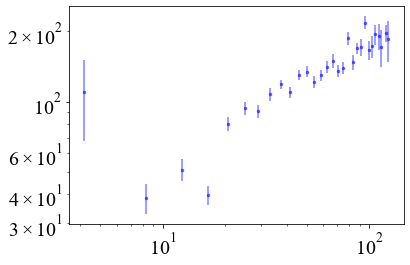

In [52]:
SF=sosf(DtRc)
SF.Lag=SF.Lag*pc

fig,ax=plt.subplots()

ax.errorbar(SF.Lag,SF.Nmqvd, yerr=SF.ErrY, marker='.', fmt=' ',color="blue", ecolor="blue",
                     alpha=0.5, markersize=5)

ax.set(xscale='log',yscale='log')

In [53]:
x=SF['Lag']
y=SF['Nmqvd']-(DtRc["RV"].std())**2
tck=interpolate.splrep(x,y,s=0)
grid=np.linspace(x.min(),x.max(),num=len(x))
ynew=interpolate.splev(grid,tck,der=0)
inter=pd.DataFrame([grid,ynew]).T
SFr=interpolate.sproot(tck)
SFr

array([ 5.79202479, 19.08249368])

In [54]:
s=SFr[1]

In [55]:
ss=np.round((DtRc["RV"].std())**2,2)

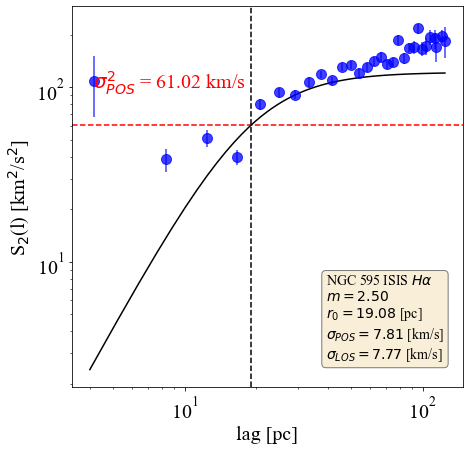

In [56]:
fig,ax=plt.subplots(figsize=(7,7))

ax.errorbar(SF.Lag,SF.Nmqvd, yerr=SF.ErrY, marker='.', fmt=' ',color="blue", ecolor="blue",
                     alpha=0.75, markersize=20)

ax.set(xlabel='lag [pc]', ylabel='S$_{2}$(l) [km$^{2}$/s$^{2}$]')

plt.axhline(y=ss, color='r', linestyle='--')
ax.text(0.25, 0.8,'$σ_{POS}^{2}$ = '+str(ss)+' km/s', ha='center', va='center', transform=ax.transAxes, color='r')


plt.axvline(x=s, color='k', linestyle='--')

lo=s

n=2.5

x=np.linspace(int(SF.Lag.min()),int(SF.Lag.max()),100)
c=1/(1+(x/lo)**n)

y=2*(1-c)*ss

plt.loglog(x,y,color='k', linestyle='-')


textstr = '\n'.join(('NGC 595 ISIS ' r'$H\alpha$' ,r'$m=%.2f$'%n, r'$r_{0}=%.2f$' % s+' [pc]',
                     r'$σ_{POS}=%.2f$' % (DtRc["RV"].std()) + ' [km/s]' , r'$σ_{LOS}=%.2f$'%(DtRc["Sig"].std()) + ' [km/s]' )) 

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.65, .3, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="20"

#ax.set_xlim(1, 250)
#ax.set_ylim(1, 750)

#fig.savefig('Img//'+samples[0][i]+'.pdf')

In [57]:
SFHac=SF

1.0


[None, None]

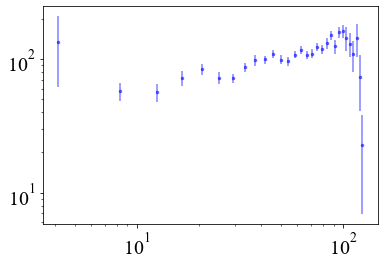

In [58]:
SF=sosf(DtBc)
SF.Lag=SF.Lag*pc

fig,ax=plt.subplots()

ax.errorbar(SF.Lag,SF.Nmqvd, yerr=SF.ErrY, marker='.', fmt=' ',color="blue", ecolor="blue",
                     alpha=0.5, markersize=5)

ax.set(xscale='log',yscale='log')

In [59]:
x=SF['Lag']
y=SF['Nmqvd']-(DtBc["RV"].std())**2
tck=interpolate.splrep(x,y,s=0)
grid=np.linspace(x.min(),x.max(),num=len(x))
ynew=interpolate.splev(grid,tck,der=0)
inter=pd.DataFrame([grid,ynew]).T
SFr=interpolate.sproot(tck)
SFr

array([120.78703952])

In [60]:
s=13

In [61]:
ss=np.round((DtBc["RV"].std())**2,2)

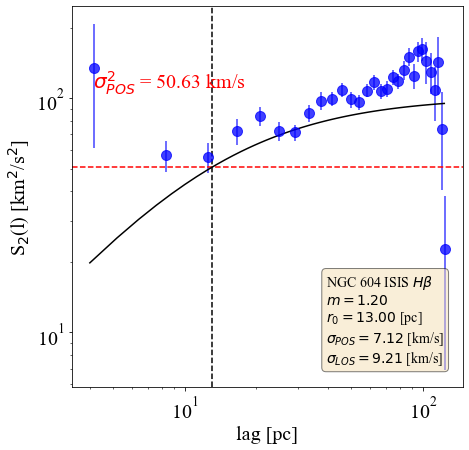

In [62]:
fig,ax=plt.subplots(figsize=(7,7))

ax.errorbar(SF.Lag,SF.Nmqvd, yerr=SF.ErrY, marker='.', fmt=' ',color="blue", ecolor="blue",
                     alpha=0.75, markersize=20)

ax.set(xlabel='lag [pc]', ylabel='S$_{2}$(l) [km$^{2}$/s$^{2}$]')

plt.axhline(y=ss, color='r', linestyle='--')
ax.text(0.25, 0.8,'$σ_{POS}^{2}$ = '+str(ss)+' km/s', ha='center', va='center', transform=ax.transAxes, color='r')


plt.axvline(x=s, color='k', linestyle='--')

lo=s

n=1.2

x=np.linspace(int(SF.Lag.min()),int(SF.Lag.max()),100)
c=1/(1+(x/lo)**n)

y=2*(1-c)*ss

plt.loglog(x,y,color='k', linestyle='-')


textstr = '\n'.join(('NGC 604 ISIS ' r'$Hβ$' ,r'$m=%.2f$'%n, r'$r_{0}=%.2f$' % s+' [pc]',
                     r'$σ_{POS}=%.2f$' % (DtBc["RV"].std()) + ' [km/s]' , r'$σ_{LOS}=%.2f$'%(DtBc["Sig"].std()) + ' [km/s]' )) 

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.65, .3, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="20"

#ax.set_xlim(1, 250)
#ax.set_ylim(1, 750)

#fig.savefig('Img//'+samples[0][i]+'.pdf')

In [63]:
SFHb=SF

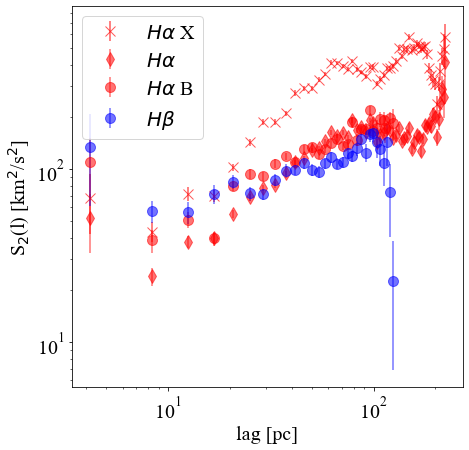

In [64]:
fig,ax=plt.subplots(figsize=(7,7))

ax.errorbar(SFHa.Lag,SFHa.Nmqvd, yerr=SFHa.ErrY, marker='x', fmt=' ',color="red", ecolor="red",
                     alpha=0.65, markersize=10,label=r'$Hα$ X')

ax.errorbar(SFHam.Lag,SFHam.Nmqvd, yerr=SFHam.ErrY, marker='d', fmt=' ',color="red", ecolor="red",
                     alpha=0.55, markersize=10,label=r'$Hα$ ')

ax.errorbar(SFHac.Lag,SFHac.Nmqvd, yerr=SFHac.ErrY, marker='o', fmt=' ',color="red", ecolor="red",
                     alpha=0.55, markersize=10,label=r'$Hα$ B')

ax.errorbar(SFHb.Lag,SFHb.Nmqvd, yerr=SFHb.ErrY, marker='o', fmt=' ',color="blue", ecolor="blue",
                     alpha=0.55, markersize=10,label=r'$H\beta$')
plt.yscale('log')
plt.xscale('log')
ax.set(xlabel='lag [pc]', ylabel='S$_{2}$(l) [km$^{2}$/s$^{2}$]')
plt.legend()

[Text(0, 0.5, '$σ$ [km/s]'), Text(0.5, 0, 'I')]

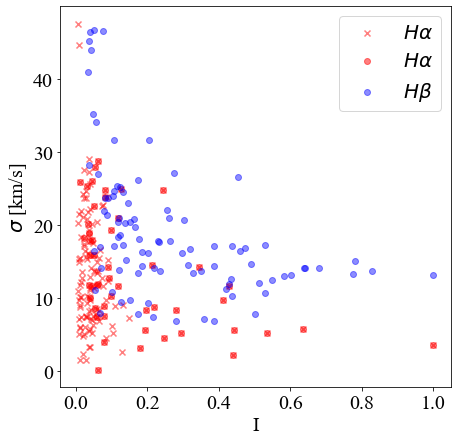

In [68]:
fig,ax=plt.subplots(figsize=(7,7))

plt.scatter(DtR[mPR]["Peak.0"]/DtR[mPR]["Peak.0"].max(),DtR[mPR]["Sig"],alpha=0.5,marker='x',color="red",label=r'$Hα$')
plt.scatter(DtRc["Peak.0"]/DtRc["Peak.0"].max(),DtRc["Sig"],alpha=0.5,marker='o',color="red",label=r'$Hα$')
plt.scatter(DtBc["Peak.0"]/DtBc["Peak.0"].max(),DtBc["Sig"],alpha=0.45,marker='o',color="blue",label=r'$Hβ$')
plt.legend()
ax.set(xlabel='I', ylabel='$σ$ [km/s]')

In [66]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 19.570207595825195 seconds ---
